#Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print("Versión de TensorFlow:", tf.__version__)

Versión de TensorFlow: 2.16.1


#Data Preprocessing

In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


##Training Image preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'archive/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3256 files belonging to 36 classes.


##Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'archive/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


#Building Model

In [5]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\ederd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [10]:
cnn.add(tf.keras.layers.Flatten())

In [11]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [15]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=36)

Epoch 1/36
102/102 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.0202 - loss: 70.1714 - val_accuracy: 0.0313 - val_loss: 3.5821
Epoch 2/36
102/102 ━━━━━━━━━━━━━━━━━━━━ 93s 904ms/step - accuracy: 0.0261 - loss: 3.5814 - val_accuracy: 0.0798 - val_loss: 3.5156
Epoch 3/36
102/102 ━━━━━━━━━━━━━━━━━━━━ 88s 854ms/step - accuracy: 0.0427 - loss: 3.5735 - val_accuracy: 0.0570 - val_loss: 3.5534
Epoch 4/36
102/102 ━━━━━━━━━━━━━━━━━━━━ 62s 599ms/step - accuracy: 0.0385 - loss: 3.5689 - val_accuracy: 0.0684 - val_loss: 3.4995
Epoch 5/36
102/102 ━━━━━━━━━━━━━━━━━━━━ 77s 749ms/step - accuracy: 0.0453 - loss: 3.5473 - val_accuracy: 0.0798 - val_loss: 3.4953
Epoch 6/36
102/102 ━━━━━━━━━━━━━━━━━━━━ 84s 814ms/step - accuracy: 0.0626 - loss: 3.5126 - val_accuracy: 0.1254 - val_loss: 3.4240
Epoch 7/36
102/102 ━━━━━━━━━━━━━━━━━━━━ 85s 827ms/step - accuracy: 0.0607 - loss: 3.5119 - val_accuracy: 0.1368 - val_loss: 3.3422
Epoch 8/36
102/102 ━━━━━━━━━━━━━━━━━━━━ 84s 817ms/step - accuracy: 0.0794 - loss: 3.

##Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

102/102 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - accuracy: 0.9384 - loss: 0.2309
Training accuracy: 0.9536240696907043


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - accuracy: 0.9475 - loss: 0.4394
Validation accuracy: 0.9316239356994629


##Saving Model

In [20]:
cnn.save('trained_model2.h5')

In [21]:
training_history.history #Return Dictionary of history

{'accuracy': [0.022113021463155746,
  0.029791153967380524,
  0.03562653437256813,
  0.037776414304971695,
  0.04852579906582832,
  0.07125306874513626,
  0.0684889405965805,
  0.09152334183454514,
  0.11394348740577698,
  0.13851352035999298,
  0.18243242800235748,
  0.251842737197876,
  0.28961917757987976,
  0.3356879651546478,
  0.3949631452560425,
  0.45178133249282837,
  0.48464372754096985,
  0.5377764105796814,
  0.5681818127632141,
  0.6062653660774231,
  0.6554054021835327,
  0.6756756901741028,
  0.7060810923576355,
  0.7414004802703857,
  0.7539926171302795,
  0.7727272510528564,
  0.8003685474395752,
  0.7994471788406372,
  0.8249385952949524,
  0.8427518606185913,
  0.8636363744735718,
  0.8725429773330688,
  0.8863636255264282,
  0.9011056423187256,
  0.8802211284637451,
  0.9133906364440918],
 'loss': [21.051294326782227,
  3.580564498901367,
  3.5754151344299316,
  3.5580835342407227,
  3.530963897705078,
  3.489741802215576,
  3.477947950363159,
  3.431076765060425,
 

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating Accuracy of Model Achieved on Validation set

In [24]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.16239356994629 %


#Accuracy Visualization

##Training Visualization

In [25]:
training_history.history['accuracy']

[0.022113021463155746,
 0.029791153967380524,
 0.03562653437256813,
 0.037776414304971695,
 0.04852579906582832,
 0.07125306874513626,
 0.0684889405965805,
 0.09152334183454514,
 0.11394348740577698,
 0.13851352035999298,
 0.18243242800235748,
 0.251842737197876,
 0.28961917757987976,
 0.3356879651546478,
 0.3949631452560425,
 0.45178133249282837,
 0.48464372754096985,
 0.5377764105796814,
 0.5681818127632141,
 0.6062653660774231,
 0.6554054021835327,
 0.6756756901741028,
 0.7060810923576355,
 0.7414004802703857,
 0.7539926171302795,
 0.7727272510528564,
 0.8003685474395752,
 0.7994471788406372,
 0.8249385952949524,
 0.8427518606185913,
 0.8636363744735718,
 0.8725429773330688,
 0.8863636255264282,
 0.9011056423187256,
 0.8802211284637451,
 0.9133906364440918]

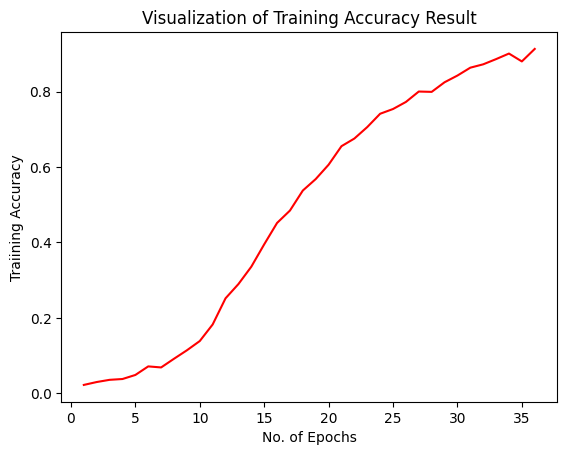

In [26]:
epochs = [i for i in range(1,37)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

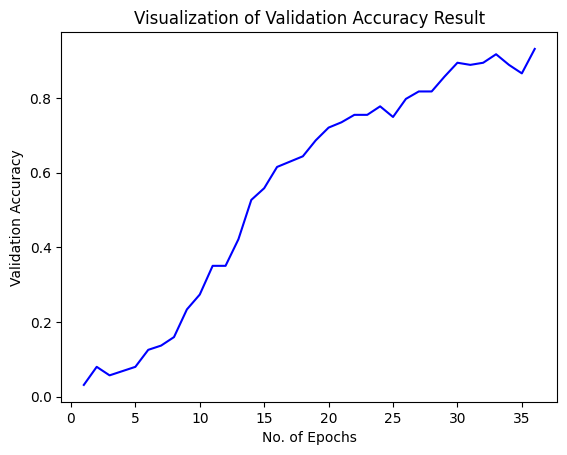

In [27]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 363 files belonging to 36 classes.


In [29]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.9305 - loss: 0.5672
Test accuracy: 0.9283746480941772
